# Importing relevant dependencies

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns
from plotnine import *

# Pandas display options:
pd.set_option('display.max.columns', None)

# Funciones Rápidas

### Lineplot Facturación Total: lineplotfact()

In [ ]:
def lineplotfact(df, var_x, var_y, lines, label_x, label_y, title):
    # Tamaño del plot
    plt.figure(figsize=(16,10))
    
    # Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
    sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
    # Lineplot
    ax = sns.lineplot(data=df, x=var_x, y=var_y, hue=lines, style=lines, markers=True, palette='bright')
    
    # Area de fondo coloreada (Temporada F/W, S/S)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

    # Separador años
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
    ax.axhspan(ymin=0, ymax=1500000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
    # localización del cuadro de leyenda
    plt.legend(loc='upper left')

    # Formato eje X: rotación de labels
    plt.xticks(rotation=35)
    
    # Formato eje Y: comas y €
    fmt = '€{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    # Formato eje Y: rango de ticks
    ax.yaxis.set_ticks(np.arange(0, 1550000, 50000))

    # Labels de los ejes
    ax.set(xlabel=label_x, ylabel=label_y)

    # Label título
    plt.title(title)
        
    plt.show()

### Lineplot Porcentaje Sobre Facturación Total: lineplotpercfact()

In [ ]:
def lineplotpercfact(df, var_x, var_y, max_y, lines, label_x, label_y, title):
    # Tamaño del plot
    plt.figure(figsize=(16,10))
    
    # Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
    sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
    # Lineplot
    ax = sns.lineplot(data=df, x=var_x, y=var_y, hue=lines, style=lines, markers=True, palette='bright')
    
    # Area de fondo coloreada (Temporada F/W, S/S)
    '''ax.axhspan(ymin=0, ymax=1300000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)'''

    # Separador años
    '''ax.axhspan(ymin=0, ymax=1300000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
    ax.axhspan(ymin=0, ymax=1300000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)'''
    
    # localización del cuadro de leyenda
    plt.legend(loc='upper left')

    # Formato eje X: rotación de labels
    plt.xticks(rotation=35)
    
    # Formato eje Y: comas y %
    fmt = '{x:,.0f}%'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    
    # Formato eje X: rango de ticks
    ax.xaxis.set_ticks(np.arange(2018, 2020.1, 1))
    
    # Formato eje Y: rango de ticks
    ax.yaxis.set_ticks(np.arange(0, max_y, 1))

    # Labels de los ejes
    ax.set(xlabel=label_x, ylabel=label_y)

    # Label título
    plt.title(title)
        
    plt.show()

# Loading in the data

In [ ]:
camperlean = pd.read_csv('/Users/darkxiii/Docs/IE Data Science Bootcamp/Camper Project/Database/CamperleanV.2.csv', parse_dates=['FECHA_FACTURA'])

In [ ]:
camperlean = camperlean.loc[~camperlean.CATEGORIA.isin(['83', '80', 'FW - Shoe', 'Kids - Closed Sandal', 'Boy - Shoe', 'Kids - High Boot', 'Boy - Sneaker-Bootie', 'Girl - Ankle-boot', 'Kids - High Boot'])]

In [ ]:
camperlean = camperlean.drop('Unnamed: 0', axis=1)

In [ ]:
camperlean.CONSUMER_COLOR.replace('Marr?n', 'Marrón', inplace=True)

# EDA

Guías sobre como hacer un EDA:<br>
* [An Extensive Step by Step Guide to Exploratory Data Analysis](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)<br>
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)<br>
* [Exploratory data analysis and feature extraction with Python](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)<br>

Reglas:
* Enfocar el EDA de las variables SOLO a responder preguntas y ofrecer insights sobre el recomendador que pide el cliente
* Usar SEABORN para todas las gráficas del EDA<br>
<br>
SUERTE Y ANIMOS!

In [ ]:
# Creación de nuevo df con columna para visualizar por año - mes
campermesano = camperlean.copy(deep=True)
campermesano['ANO_MES_FACTURA'] = campermesano.FECHA_FACTURA.dt.strftime('%Y-%m')

In [ ]:
campermesano.head()

,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO,ANO_MES_FACTURA
0,2845640249,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,2018,12,2018-12-10,146.01,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DE,Köln,DE,2018-12
1,2843635446,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,2018,12,2018-12-10,172.63,87,F/W,2018,K400342-001,41,GB,101IMNIMN0MK400342,1.00,Zapatos Adulto,Iman,Iman,WOMEN,Women Mid boot,Lace Up Bootie,Black,Negro,Dark colours,UNDEFINED,70.0,70 ++,GB,West Wittering,EN,2018-12
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38.0,30-39,CA,Toronto,EN,2018-12
3,2843635538,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,2018,12,2018-12-10,61.41,87,F/W,2018,18811-061,45,GB,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Lt. Pastel Grey,Gris,Pastel,WOMAN,UNDEFINED,UNDEFINED,GB,London,EN,2018-12
4,2853601888,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,2018,12,2018-12-10,107.22,87,F/W,2018,K300192-005,42,DK,101PEUPEUCHK300192,1.00,Zapatos Adulto,Peu,Peu Cami,MEN,Men Ankle Boot,Basket bootie,Black,Negro,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DK,Valby,EN,2018-12


In [ ]:
# Creando subset de campermesano con solo categorias de mujer, para visualizar facturación por año - mes
women = campermesano.loc[camperlean.GENERO_PRODUCTO == 'WOMEN', :].groupby(by=['CATEGORIA', 'ANO_MES_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
women

,CATEGORIA,ANO_MES_FACTURA,IMP_VENTA_NETO_EUR
0,Women - Semi-open Shoe,2018-01,"37,079.95"
1,Women - Semi-open Shoe,2018-02,"44,088.06"
2,Women - Semi-open Shoe,2018-03,"60,739.50"
3,Women - Semi-open Shoe,2018-04,"126,597.63"
4,Women - Semi-open Shoe,2018-05,"91,257.33"
...,...,...,...
367,Women Sneaker Bootie,2020-08,"38,071.56"
368,Women Sneaker Bootie,2020-09,"46,036.41"
369,Women Sneaker Bootie,2020-10,"101,501.81"
370,Women Sneaker Bootie,2020-11,"196,798.05"


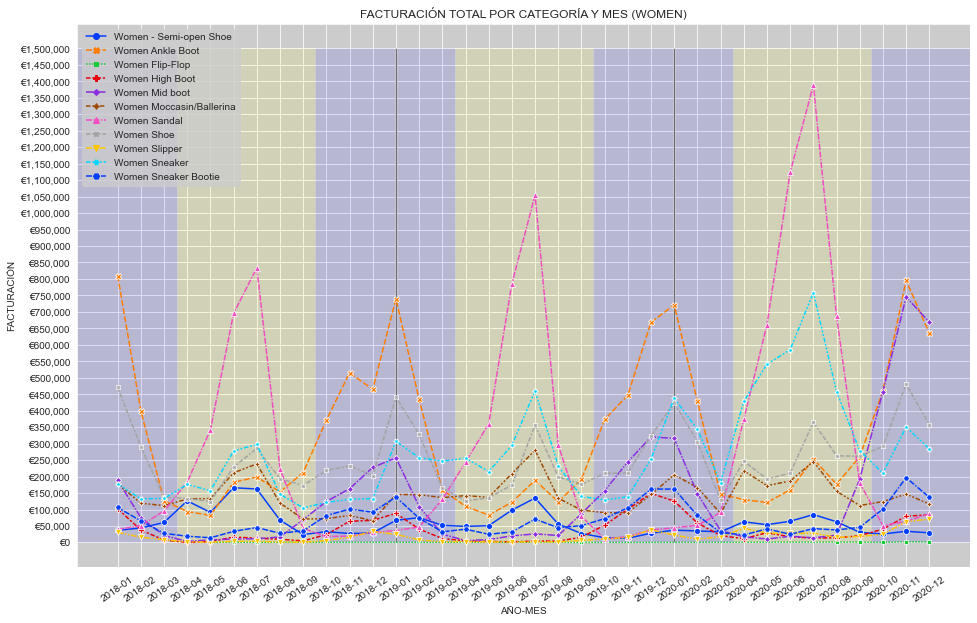

In [ ]:
# lineplot usando función lineplotfact definida mas arriba - lineplotfact(df, var_x, var_y, lines, label_x, label_y, title):
lineplotfact(women, 'ANO_MES_FACTURA', 'IMP_VENTA_NETO_EUR', 'CATEGORIA', 'AÑO-MES', 'FACTURACIÓN', 'FACTURACIÓN TOTAL POR CATEGORÍA Y MES (WOMEN)')

In [ ]:
# Creando subset de campersano con SOLO categorias Top-Seller de mujer, para visualizar facturación por año - mes
sandalboot = campermesano.loc[(camperlean.CATEGORIA == 'Women Sandal') | (camperlean.CATEGORIA == 'Women Ankle Boot'), :].groupby(by=['CATEGORIA', 'ANO_MES_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
sandalboot

,CATEGORIA,ANO_MES_FACTURA,IMP_VENTA_NETO_EUR
0,Women Ankle Boot,2018-01,"810,032.49"
1,Women Ankle Boot,2018-02,"400,258.59"
2,Women Ankle Boot,2018-03,"126,758.62"
3,Women Ankle Boot,2018-04,"93,967.19"
4,Women Ankle Boot,2018-05,"82,385.41"
...,...,...,...
67,Women Sandal,2020-08,"687,277.87"
68,Women Sandal,2020-09,"181,395.61"
69,Women Sandal,2020-10,"51,335.19"
70,Women Sandal,2020-11,"64,212.07"


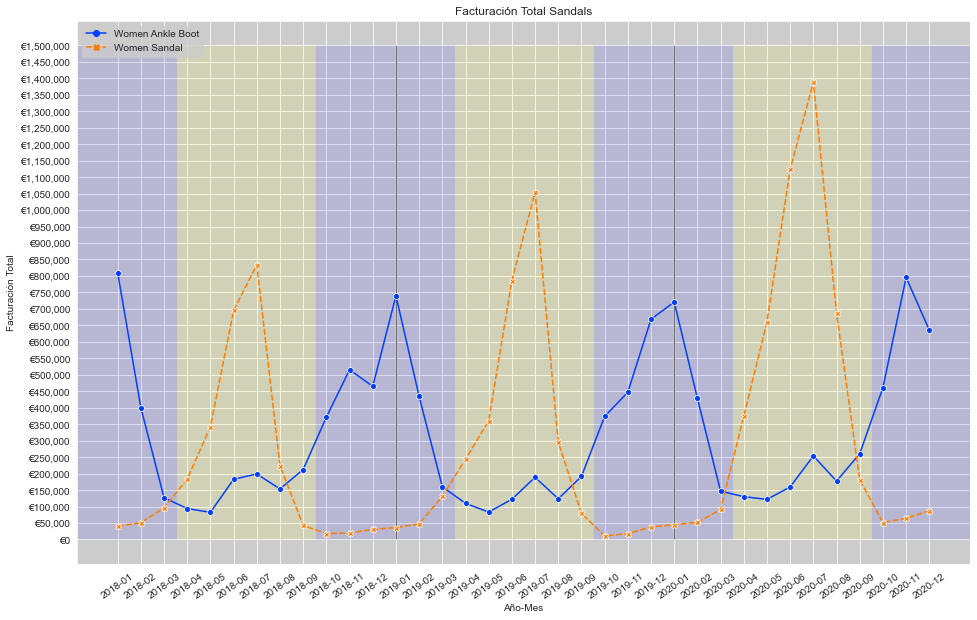

In [ ]:
lineplotfact(sandalboot, 'ANO_MES_FACTURA', 'IMP_VENTA_NETO_EUR', 'CATEGORIA', 'Año-Mes', 'Facturación Total', 'Facturación Total Sandals')

In [ ]:
# Facturación total por año de categoría Sandal
factcat = camperlean.groupby(by=['CATEGORIA', 'GENERO_PRODUCTO', 'ANO_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
factcat

,CATEGORIA,GENERO_PRODUCTO,ANO_FACTURA,IMP_VENTA_NETO_EUR
0,Kids - Ankle-boot,KIDS,2018,"536,000.34"
1,Kids - Ankle-boot,KIDS,2019,"684,108.94"
2,Kids - Ankle-boot,KIDS,2020,"772,459.69"
3,Kids - Ankle-boot/Boot,KIDS,2018,"154,179.61"
4,Kids - Ankle-boot/Boot,KIDS,2019,"34,481.10"
...,...,...,...,...
85,Women Sneaker,WOMEN,2019,"2,931,013.05"
86,Women Sneaker,WOMEN,2020,"4,859,250.51"
87,Women Sneaker Bootie,WOMEN,2018,"650,935.60"
88,Women Sneaker Bootie,WOMEN,2019,"848,306.45"


In [ ]:
# Facturación global por año
ventas_ano = camperlean.groupby(by=['ANO_FACTURA', 'GENERO_PRODUCTO'], as_index=False).sum('IMP_VENTA_NETO_EUR')
ventas_ano

,ANO_FACTURA,GENERO_PRODUCTO,FACTURA_ID,MES_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,ANO_TEMPORADA,TALLA,GRUPO_ARTICULO_PRODUCTO_ID
0,2018,KIDS,104355448713778,232378,"2,340,439.64",3162302,74128410,1089836,"293,896.00"
1,2018,MEN,297609063273987,630582,"12,205,799.13",9006423,211360069,4481627,"104,751.00"
2,2018,WOMEN,365114633991760,777181,"15,325,113.92",11046165,259175022,4946010,"128,447.00"
3,2019,KIDS,120651479255551,263780,"2,497,895.22",3616115,82879891,1214263,"328,432.00"
4,2019,MEN,400601002451817,858297,"15,101,552.98",11991791,275015451,5827007,"136,230.00"
5,2019,WOMEN,457426222646834,970507,"17,675,060.15",13688613,313932811,5984553,"155,507.00"
6,2020,KIDS,114332552111066,371988,"3,487,251.81",5054079,113234606,1670234,"448,488.00"
7,2020,MEN,362018446156754,1181974,"19,768,722.90",15978322,358154093,7578008,"177,322.00"
8,2020,WOMEN,439511275806042,1426194,"24,445,298.43",19393116,434699287,8275758,"215,217.00"


In [ ]:
factcat = pd.merge(factcat, ventas_ano, how='left', on=['ANO_FACTURA', 'GENERO_PRODUCTO']).loc[:, ['CATEGORIA','GENERO_PRODUCTO','ANO_FACTURA', 'IMP_VENTA_NETO_EUR_x', 'IMP_VENTA_NETO_EUR_y']]
factcat

,CATEGORIA,GENERO_PRODUCTO,ANO_FACTURA,IMP_VENTA_NETO_EUR_x,IMP_VENTA_NETO_EUR_y
0,Kids - Ankle-boot,KIDS,2018,"536,000.34","2,340,439.64"
1,Kids - Ankle-boot,KIDS,2019,"684,108.94","2,497,895.22"
2,Kids - Ankle-boot,KIDS,2020,"772,459.69","3,487,251.81"
3,Kids - Ankle-boot/Boot,KIDS,2018,"154,179.61","2,340,439.64"
4,Kids - Ankle-boot/Boot,KIDS,2019,"34,481.10","2,497,895.22"
...,...,...,...,...,...
85,Women Sneaker,WOMEN,2019,"2,931,013.05","17,675,060.15"
86,Women Sneaker,WOMEN,2020,"4,859,250.51","24,445,298.43"
87,Women Sneaker Bootie,WOMEN,2018,"650,935.60","15,325,113.92"
88,Women Sneaker Bootie,WOMEN,2019,"848,306.45","17,675,060.15"


In [ ]:
# Cálculo de porcentaje de facturación de categoría Women Sandal respecto a la facturación global por año
factcat['Porcentaje_Venta'] = factcat.IMP_VENTA_NETO_EUR_x / factcat.IMP_VENTA_NETO_EUR_y * 100
factcat

,CATEGORIA,GENERO_PRODUCTO,ANO_FACTURA,IMP_VENTA_NETO_EUR_x,IMP_VENTA_NETO_EUR_y,Porcentaje_Venta
0,Kids - Ankle-boot,KIDS,2018,"536,000.34","2,340,439.64",22.90
1,Kids - Ankle-boot,KIDS,2019,"684,108.94","2,497,895.22",27.39
2,Kids - Ankle-boot,KIDS,2020,"772,459.69","3,487,251.81",22.15
3,Kids - Ankle-boot/Boot,KIDS,2018,"154,179.61","2,340,439.64",6.59
4,Kids - Ankle-boot/Boot,KIDS,2019,"34,481.10","2,497,895.22",1.38
...,...,...,...,...,...,...
85,Women Sneaker,WOMEN,2019,"2,931,013.05","17,675,060.15",16.58
86,Women Sneaker,WOMEN,2020,"4,859,250.51","24,445,298.43",19.88
87,Women Sneaker Bootie,WOMEN,2018,"650,935.60","15,325,113.92",4.25
88,Women Sneaker Bootie,WOMEN,2019,"848,306.45","17,675,060.15",4.80


In [ ]:
factcatwomen = factcat.loc[factcat.GENERO_PRODUCTO == 'WOMEN', :].sort_values(by='Porcentaje_Venta', ascending=False)

In [ ]:
factcatmen = factcat.loc[factcat.GENERO_PRODUCTO == 'MEN', :].sort_values(by='Porcentaje_Venta', ascending=False)

In [ ]:
factcatkids = factcat.loc[factcat.GENERO_PRODUCTO == 'KIDS', :].sort_values(by='Porcentaje_Venta', ascending=False)

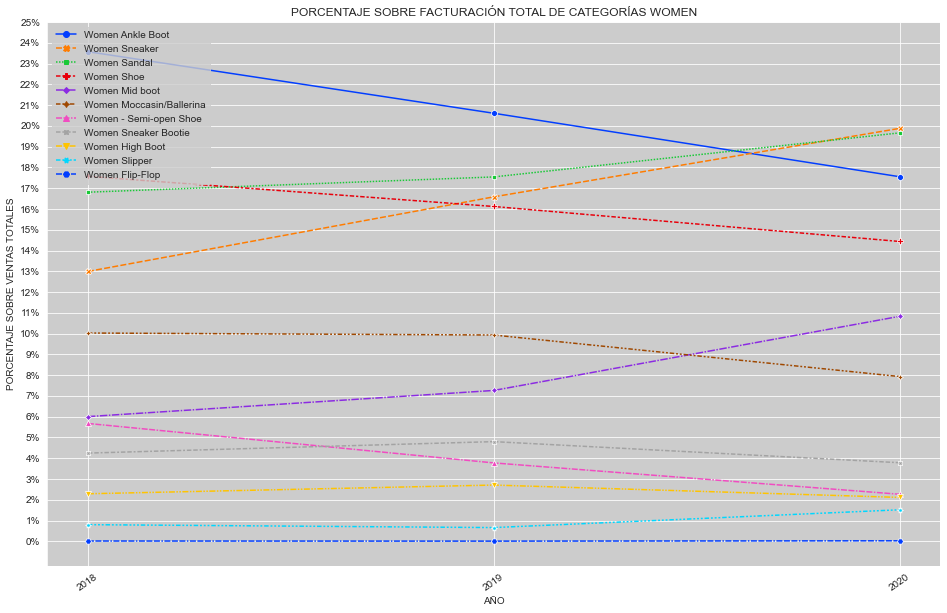

In [ ]:
lineplotpercfact(factcatwomen, 'ANO_FACTURA', 'Porcentaje_Venta', 26, 'CATEGORIA', 'AÑO', 'PORCENTAJE SOBRE VENTAS TOTALES', 'PORCENTAJE SOBRE FACTURACIÓN TOTAL DE CATEGORÍAS WOMEN')

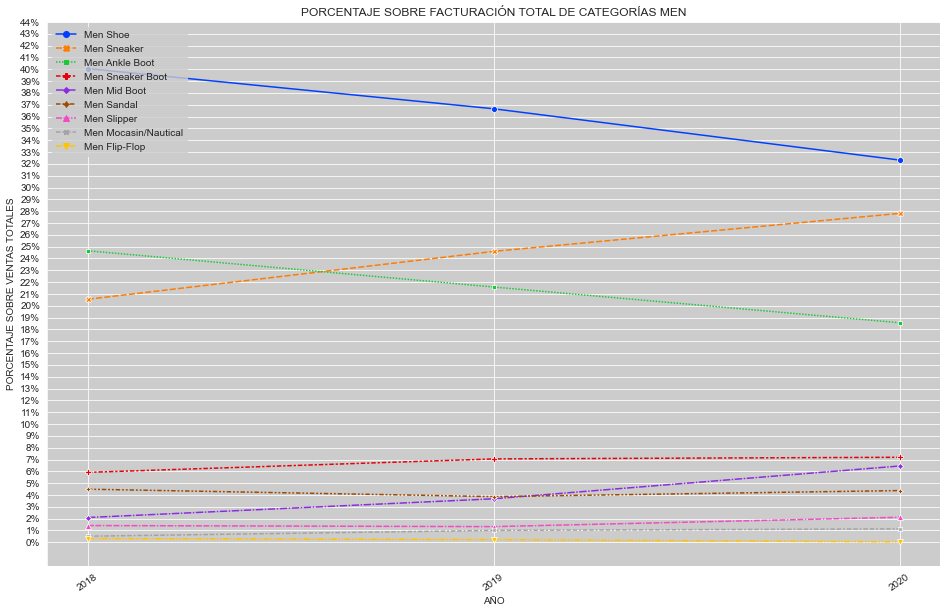

In [ ]:
lineplotpercfact(factcatmen, 'ANO_FACTURA', 'Porcentaje_Venta', 45,'CATEGORIA', 'AÑO', 'PORCENTAJE SOBRE VENTAS TOTALES', 'PORCENTAJE SOBRE FACTURACIÓN TOTAL DE CATEGORÍAS MEN')

In [ ]:
factcatkids = factcat.loc[factcat.GENERO_PRODUCTO == 'KIDS', :].sort_values(by='Porcentaje_Venta', ascending=False)

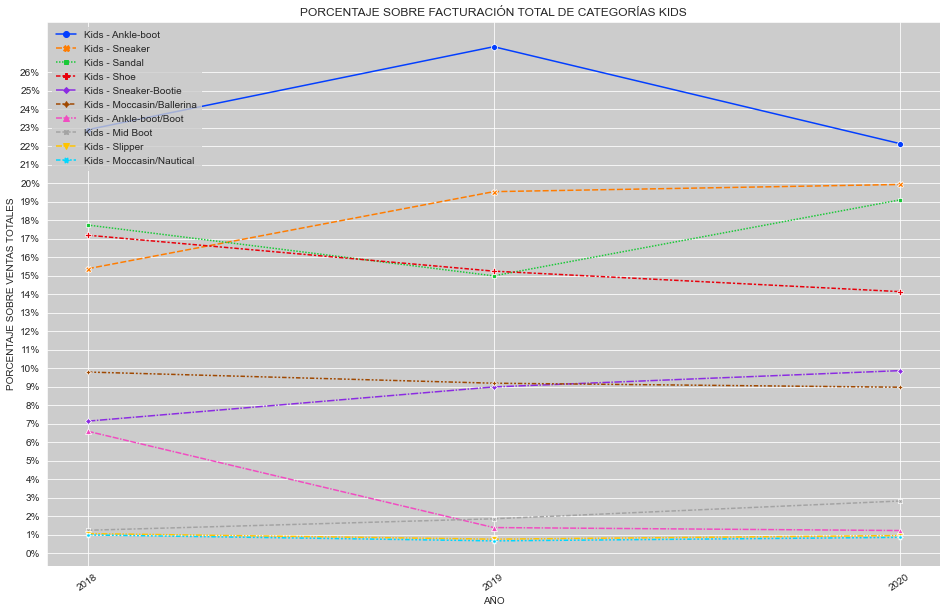

In [ ]:
lineplotpercfact(factcatkids, 'ANO_FACTURA', 'Porcentaje_Venta', 27,'CATEGORIA', 'AÑO', 'PORCENTAJE SOBRE VENTAS TOTALES', 'PORCENTAJE SOBRE FACTURACIÓN TOTAL DE CATEGORÍAS KIDS')

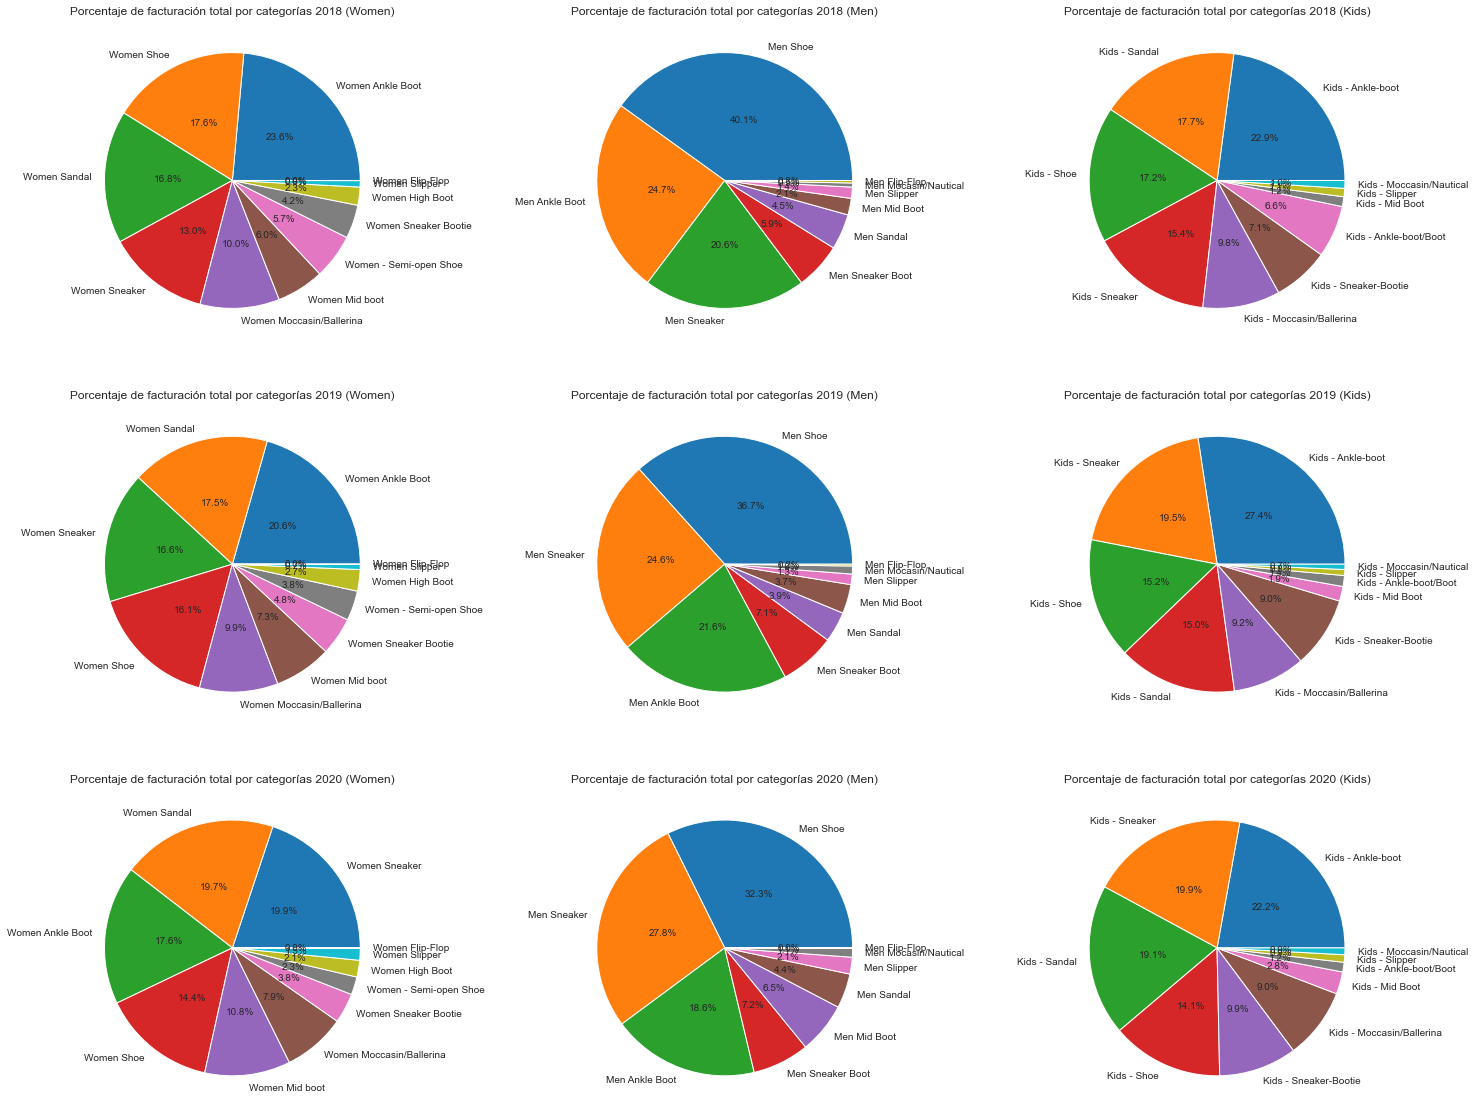

In [ ]:
fig = plt.figure(figsize=[25,20])

ax1 = fig.add_subplot(331)
labelswomen = factcatwomen.loc[factcatwomen.ANO_FACTURA == 2018, :].CATEGORIA
ax1.pie(x=factcatwomen.loc[factcatwomen.ANO_FACTURA == 2018, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelswomen, pctdistance=0.5)
ax1.title.set_text("Porcentaje de facturación total por categorías 2018 (Women)")

ax2 = fig.add_subplot(332)
labelsmen = factcatmen.loc[factcatmen.ANO_FACTURA == 2018, :].CATEGORIA
ax2.pie(x=factcatmen.loc[factcatmen.ANO_FACTURA == 2018, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelsmen, pctdistance=0.5)
ax2.title.set_text("Porcentaje de facturación total por categorías 2018 (Men)")

ax3 = fig.add_subplot(333)
labelskids = factcatkids.loc[factcatkids.ANO_FACTURA == 2018, :].CATEGORIA
ax3.pie(x=factcatkids.loc[factcatkids.ANO_FACTURA == 2018, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelskids, pctdistance=0.5)
ax3.title.set_text("Porcentaje de facturación total por categorías 2018 (Kids)")



ax1 = fig.add_subplot(334)
labelswomen = factcatwomen.loc[factcatwomen.ANO_FACTURA == 2019, :].CATEGORIA
ax1.pie(x=factcatwomen.loc[factcatwomen.ANO_FACTURA == 2019, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelswomen, pctdistance=0.5)
ax1.title.set_text("Porcentaje de facturación total por categorías 2019 (Women)")

ax2 = fig.add_subplot(335)
labelsmen = factcatmen.loc[factcatmen.ANO_FACTURA == 2019, :].CATEGORIA
ax2.pie(x=factcatmen.loc[factcatmen.ANO_FACTURA == 2019, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelsmen, pctdistance=0.5)
ax2.title.set_text("Porcentaje de facturación total por categorías 2019 (Men)")

ax3 = fig.add_subplot(336)
labelskids = factcatkids.loc[factcatkids.ANO_FACTURA == 2019, :].CATEGORIA
ax3.pie(x=factcatkids.loc[factcatkids.ANO_FACTURA == 2019, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelskids, pctdistance=0.5)
ax3.title.set_text("Porcentaje de facturación total por categorías 2019 (Kids)")



ax1 = fig.add_subplot(337)
labelswomen = factcatwomen.loc[factcatwomen.ANO_FACTURA == 2020, :].CATEGORIA
ax1.pie(x=factcatwomen.loc[factcatwomen.ANO_FACTURA == 2020, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelswomen, pctdistance=0.5)
ax1.title.set_text("Porcentaje de facturación total por categorías 2020 (Women)")

ax2 = fig.add_subplot(338)
labelsmen = factcatmen.loc[factcatmen.ANO_FACTURA == 2020, :].CATEGORIA
ax2.pie(x=factcatmen.loc[factcatmen.ANO_FACTURA == 2020, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelsmen, pctdistance=0.5)
ax2.title.set_text("Porcentaje de facturación total por categorías 2020 (Men)")

ax3 = fig.add_subplot(339)
labelskids = factcatkids.loc[factcatkids.ANO_FACTURA == 2020, :].CATEGORIA
ax3.pie(x=factcatkids.loc[factcatkids.ANO_FACTURA == 2020, :].IMP_VENTA_NETO_EUR_x, autopct="%.1f%%", labels=labelskids, pctdistance=0.5)
ax3.title.set_text("Porcentaje de facturación total por categorías 2020 (Kids)")

#fig.tight_layout()
plt.show()

In [ ]:
factcatwomen.head()

,CATEGORIA,GENERO_PRODUCTO,ANO_FACTURA,IMP_VENTA_NETO_EUR_x,IMP_VENTA_NETO_EUR_y,Porcentaje_Venta
60,Women Ankle Boot,WOMEN,2018,"3,612,283.73","15,325,113.92",23.57
61,Women Ankle Boot,WOMEN,2019,"3,642,269.70","17,675,060.15",20.61
86,Women Sneaker,WOMEN,2020,"4,859,250.51","24,445,298.43",19.88
77,Women Sandal,WOMEN,2020,"4,806,454.28","24,445,298.43",19.66
78,Women Shoe,WOMEN,2018,"2,692,651.34","15,325,113.92",17.57


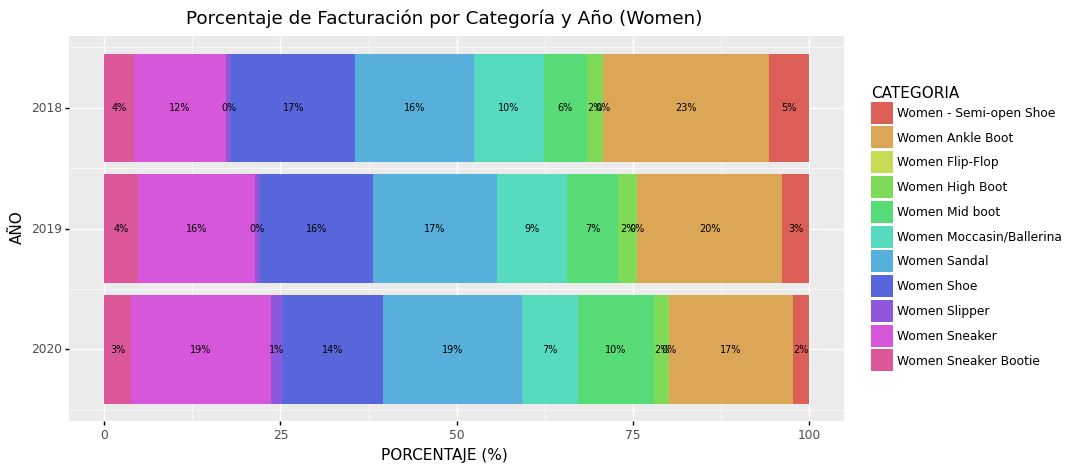

<ggplot: (8762274498045)>

In [ ]:
ggplot(aes(x='ANO_FACTURA', y='Porcentaje_Venta', fill='CATEGORIA', label=factcatwomen.Porcentaje_Venta.astype(int).astype(str)+'%'), factcatwomen)\
    + geom_col() + geom_text(size = 7, position=position_stack(vjust=0.5))\
    + labs(title="Porcentaje de Facturación por Categoría y Año (Women)", x="AÑO", y="PORCENTAJE (%)")\
    + coord_flip()\
    + scale_x_continuous(trans = "reverse")\
    + theme(figure_size=(10, 5))

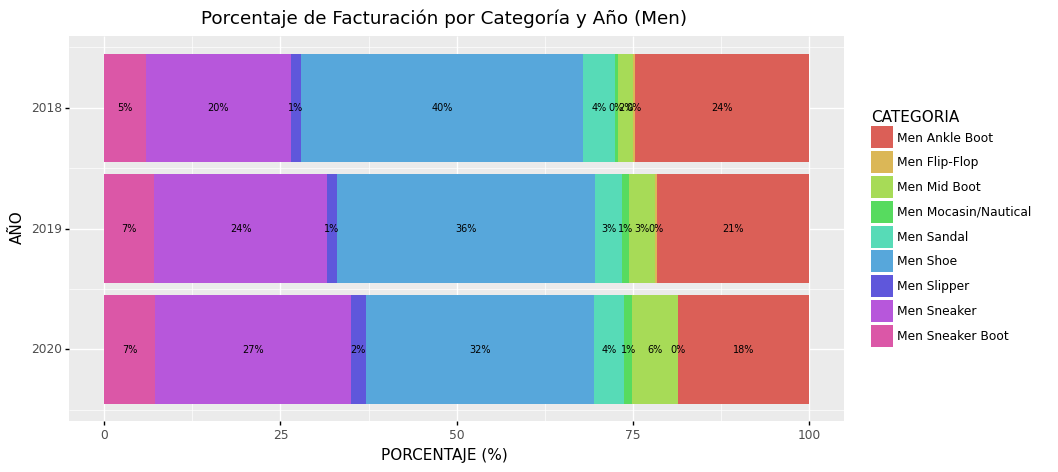

<ggplot: (8762274112381)>

In [ ]:
ggplot(aes(x='ANO_FACTURA', y='Porcentaje_Venta', fill='CATEGORIA', label=factcatmen.Porcentaje_Venta.astype(int).astype(str)+'%'), factcatmen)\
    + geom_col() + geom_text(size = 7, position=position_stack(vjust=0.5))\
    + labs(title="Porcentaje de Facturación por Categoría y Año (Men)", x="AÑO", y="PORCENTAJE (%)")\
    + coord_flip()\
    + scale_x_continuous(trans = "reverse")\
    + theme(figure_size=(10, 5))

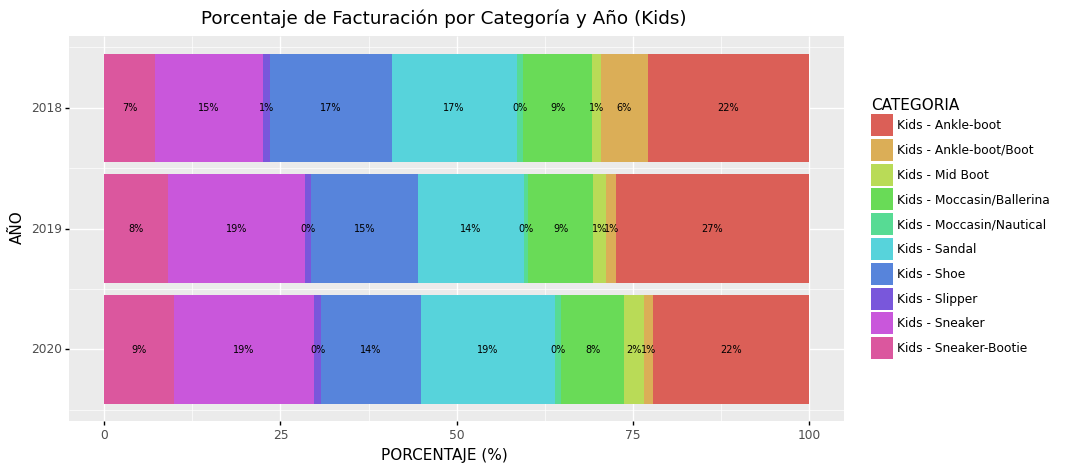

<ggplot: (8762274095185)>

In [ ]:
ggplot(aes(x='ANO_FACTURA', y='Porcentaje_Venta', fill='CATEGORIA', label=factcatkids.Porcentaje_Venta.astype(int).astype(str)+'%'), factcatkids)\
    + geom_col() + geom_text(size = 7, position=position_stack(vjust=0.5))\
    + labs(title="Porcentaje de Facturación por Categoría y Año (Kids)", x="AÑO", y="PORCENTAJE (%)")\
    + coord_flip()\
    + scale_x_continuous(trans = "reverse")\
    + theme(figure_size=(10, 5))

In [ ]:
factcatwomen = factcat.loc[factcat.GENERO_PRODUCTO == 'WOMEN', :].sort_values(by='Porcentaje_Venta', ascending=False)
factcatwomen.groupby(by='CATEGORIA').Porcentaje_Venta.sum().sort_values()

CATEGORIA
Women Flip-Flop             0.05
Women Slipper               2.98
Women High Boot             7.11
Women - Semi-open Shoe     11.72
Women Sneaker Bootie       12.83
Women Mid boot             24.10
Women Moccasin/Ballerina   27.89
Women Shoe                 48.12
Women Sneaker              49.45
Women Sandal               54.01
Women Ankle Boot           61.73
Name: Porcentaje_Venta, dtype: float64

In [ ]:
topsellerswomen = campermesano.loc[camperlean.CATEGORIA.isin(['Women Sandal', 'Women Ankle Boot', 'Women Sneaker', 'Women Shoe']), :].groupby(by=['CATEGORIA', 'ANO_MES_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()

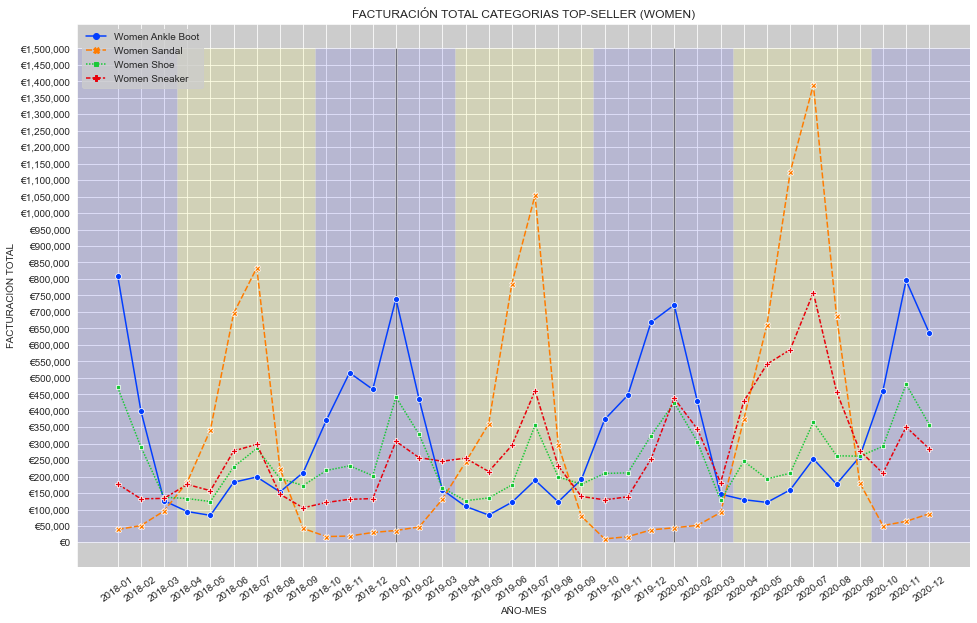

In [ ]:
lineplotfact(topsellerswomen, 'ANO_MES_FACTURA', 'IMP_VENTA_NETO_EUR', 'CATEGORIA', 'AÑO-MES', 'FACTURACIÓN TOTAL', 'FACTURACIÓN TOTAL CATEGORIAS TOP-SELLER (WOMEN)')

In [ ]:
lowsellerswomen = campermesano.loc[(camperlean.GENERO_PRODUCTO == 'WOMEN') & (~camperlean.CATEGORIA.isin(['Women Sandal', 'Women Ankle Boot', 'Women Sneaker', 'Women Shoe'])), :].groupby(by=['CATEGORIA', 'ANO_MES_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
lowsellerswomen

,CATEGORIA,ANO_MES_FACTURA,IMP_VENTA_NETO_EUR
0,Women - Semi-open Shoe,2018-01,"37,079.95"
1,Women - Semi-open Shoe,2018-02,"44,088.06"
2,Women - Semi-open Shoe,2018-03,"60,739.50"
3,Women - Semi-open Shoe,2018-04,"126,597.63"
4,Women - Semi-open Shoe,2018-05,"91,257.33"
...,...,...,...
223,Women Sneaker Bootie,2020-08,"38,071.56"
224,Women Sneaker Bootie,2020-09,"46,036.41"
225,Women Sneaker Bootie,2020-10,"101,501.81"
226,Women Sneaker Bootie,2020-11,"196,798.05"


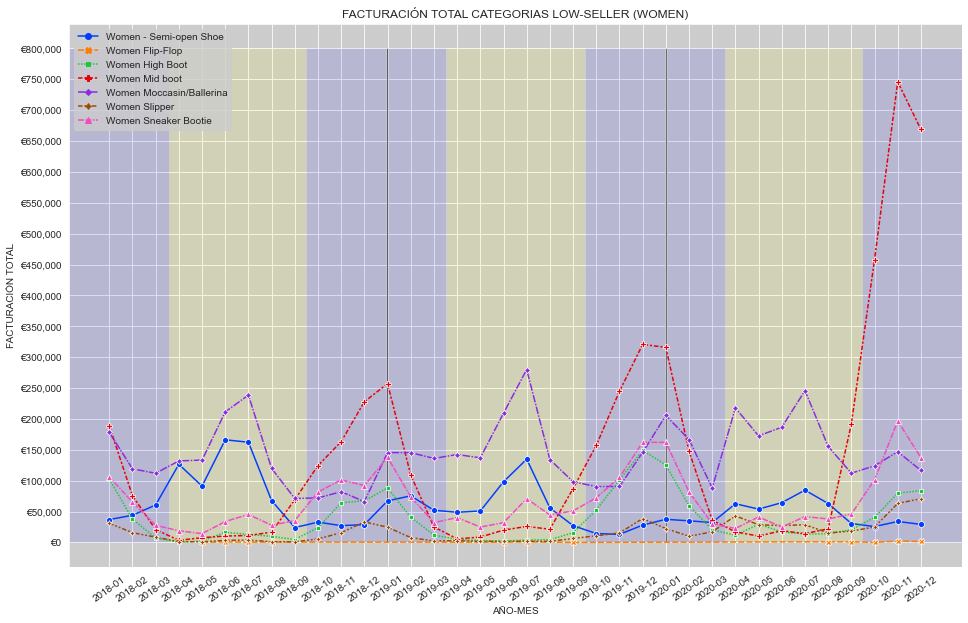

In [ ]:
# Tamaño del plot
plt.figure(figsize=(16,10))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
# Lineplot
ax = sns.lineplot(data=lowsellerswomen, x='ANO_MES_FACTURA', y='IMP_VENTA_NETO_EUR', hue='CATEGORIA', style='CATEGORIA', markers=True, palette='bright')
    
# Area de fondo coloreada (Temporada F/W, S/S)
ax.axhspan(ymin=0, ymax=800000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=800000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

# Separador años
ax.axhspan(ymin=0, ymax=800000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
ax.axhspan(ymin=0, ymax=800000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
# localización del cuadro de leyenda
plt.legend(loc='upper left')

# Formato eje X: rotación de labels
plt.xticks(rotation=35)
    
# Formato eje Y: comas y €
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje Y: rango de ticks
ax.yaxis.set_ticks(np.arange(0, 850000, 50000))

# Labels de los ejes
ax.set(xlabel='AÑO-MES', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL CATEGORIAS LOW-SELLER (WOMEN)')
        
plt.show()

In [ ]:
factcatmen = factcat.loc[factcat.GENERO_PRODUCTO == 'MEN', :].sort_values(by='Porcentaje_Venta', ascending=False)
factcatmen.groupby(by='CATEGORIA').Porcentaje_Venta.sum().sort_values()

CATEGORIA
Men Flip-Flop            0.57
Men Mocasin/Nautical     2.65
Men Slipper              4.86
Men Mid Boot            12.22
Men Sandal              12.73
Men Sneaker Boot        20.15
Men Ankle Boot          64.81
Men Sneaker             72.97
Men Shoe               109.04
Name: Porcentaje_Venta, dtype: float64

In [ ]:
topsellersmen = campermesano.loc[camperlean.CATEGORIA.isin(['Men Ankle Boot', 'Men Sneaker', 'Men Shoe']), :].groupby(by=['CATEGORIA', 'ANO_MES_FACTURA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
topsellersmen

,CATEGORIA,ANO_MES_FACTURA,IMP_VENTA_NETO_EUR
0,Men Ankle Boot,2018-01,"780,334.57"
1,Men Ankle Boot,2018-02,"360,541.10"
2,Men Ankle Boot,2018-03,"91,266.95"
3,Men Ankle Boot,2018-04,"47,648.89"
4,Men Ankle Boot,2018-05,"38,170.11"
...,...,...,...
103,Men Sneaker,2020-08,"545,658.74"
104,Men Sneaker,2020-09,"300,014.30"
105,Men Sneaker,2020-10,"248,162.65"
106,Men Sneaker,2020-11,"503,378.92"


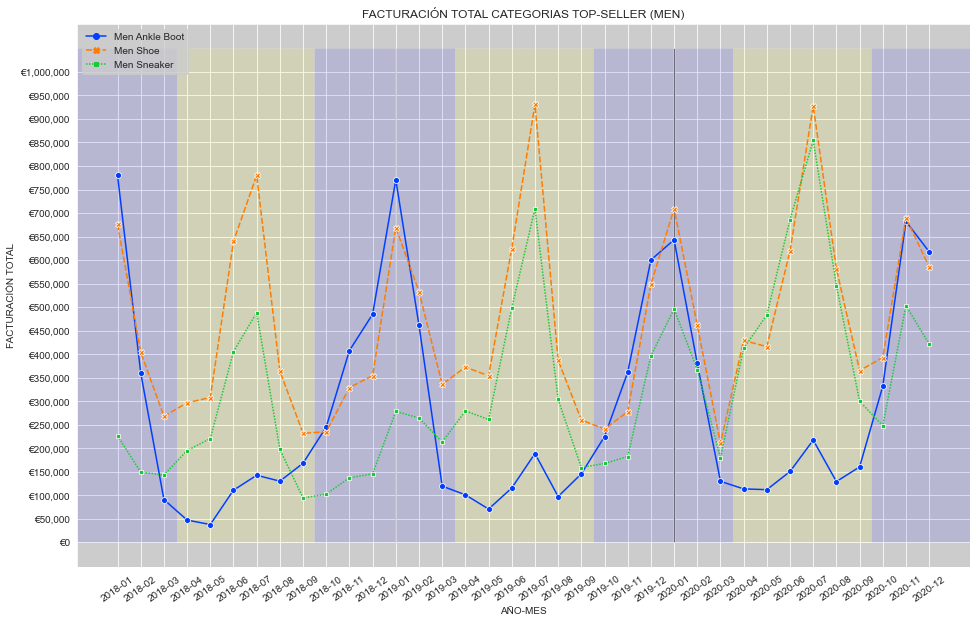

In [ ]:
# Tamaño del plot
plt.figure(figsize=(16,10))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
# Lineplot
ax = sns.lineplot(data=topsellersmen, x='ANO_MES_FACTURA', y='IMP_VENTA_NETO_EUR', hue='CATEGORIA', style='CATEGORIA', markers=True, palette='bright')
    
# Area de fondo coloreada (Temporada F/W, S/S)
ax.axhspan(ymin=0, ymax=1050000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

# Separador años
ax.axhspan(ymin=0, ymax=1050000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
ax.axhspan(ymin=0, ymax=1050000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
# localización del cuadro de leyenda
plt.legend(loc='upper left')

# Formato eje X: rotación de labels
plt.xticks(rotation=35)
    
# Formato eje Y: comas y €
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje Y: rango de ticks
ax.yaxis.set_ticks(np.arange(0, 1050000, 50000))

# Labels de los ejes
ax.set(xlabel='AÑO-MES', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL CATEGORIAS TOP-SELLER (MEN)')
        
plt.show()

In [ ]:
lowsellersmen = campermesano.loc[(camperlean.GENERO_PRODUCTO == 'MEN') & (~camperlean.CATEGORIA.isin(['Men Ankle Boot', 'Men Sneaker', 'Men Shoe'])), :].groupby(by=['ANO_MES_FACTURA', 'CATEGORIA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
lowsellersmen

,ANO_MES_FACTURA,CATEGORIA,IMP_VENTA_NETO_EUR
0,2018-01,Men Flip-Flop,"1,125.22"
1,2018-01,Men Mid Boot,"37,768.16"
2,2018-01,Men Mocasin/Nautical,"9,742.48"
3,2018-01,Men Sandal,"11,742.43"
4,2018-01,Men Slipper,"32,200.18"
...,...,...,...
201,2020-12,Men Mid Boot,"315,490.42"
202,2020-12,Men Mocasin/Nautical,"21,605.01"
203,2020-12,Men Sandal,"11,372.36"
204,2020-12,Men Slipper,"94,149.62"


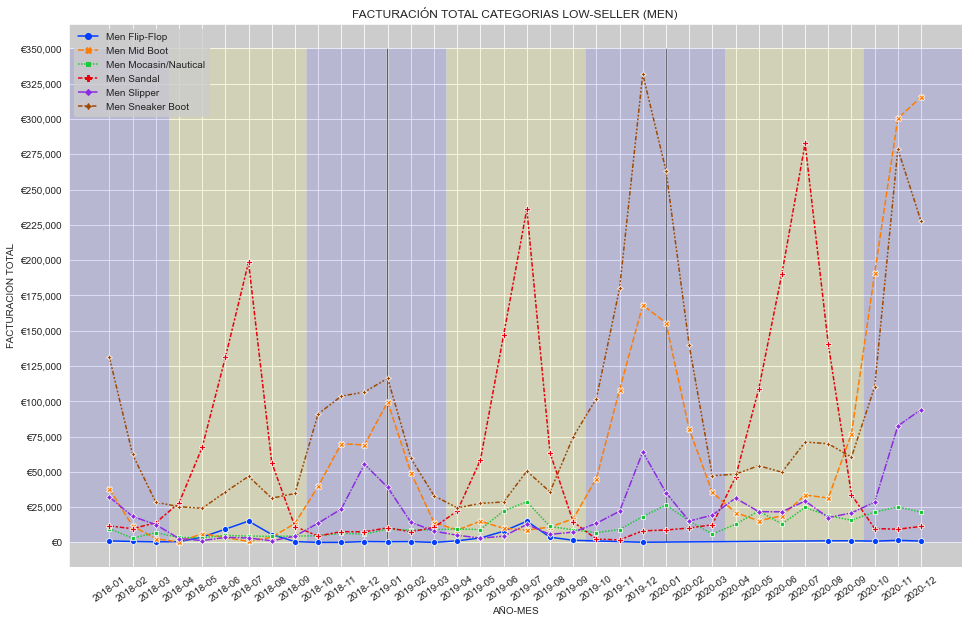

In [ ]:
# Tamaño del plot
plt.figure(figsize=(16,10))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
# Lineplot
ax = sns.lineplot(data=lowsellersmen, x='ANO_MES_FACTURA', y='IMP_VENTA_NETO_EUR', hue='CATEGORIA', style='CATEGORIA', markers=True, palette='bright')
    
# Area de fondo coloreada (Temporada F/W, S/S)
ax.axhspan(ymin=0, ymax=350000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=350000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

# Separador años
ax.axhspan(ymin=0, ymax=350000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
ax.axhspan(ymin=0, ymax=350000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
# localización del cuadro de leyenda
plt.legend(loc='upper left')

# Formato eje X: rotación de labels
plt.xticks(rotation=35)
    
# Formato eje Y: comas y €
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje Y: rango de ticks
ax.yaxis.set_ticks(np.arange(0, 351000, 25000))

# Labels de los ejes
ax.set(xlabel='AÑO-MES', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL CATEGORIAS LOW-SELLER (MEN)')
        
plt.show()

In [ ]:
factcatkids = factcat.loc[factcat.GENERO_PRODUCTO == 'KIDS', :].sort_values(by='Porcentaje_Venta', ascending=False)
factcatkids.groupby(by='CATEGORIA').Porcentaje_Venta.sum().sort_values()

CATEGORIA
Kids - Moccasin/Nautical     2.49
Kids - Slipper               2.76
Kids - Mid Boot              5.90
Kids - Ankle-boot/Boot       9.19
Kids - Sneaker-Bootie       25.99
Kids - Moccasin/Ballerina   27.95
Kids - Shoe                 46.58
Kids - Sandal               51.83
Kids - Sneaker              54.86
Kids - Ankle-boot           72.44
Name: Porcentaje_Venta, dtype: float64

In [ ]:
topsellerskids = campermesano.loc[camperlean.CATEGORIA.isin(['Kids - Ankle-boot', 'Kids - Sneaker', 'Kids - Sandal', 'Kids - Shoe']), :].groupby(by=['ANO_MES_FACTURA', 'CATEGORIA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
topsellerskids

,ANO_MES_FACTURA,CATEGORIA,IMP_VENTA_NETO_EUR
0,2018-01,Kids - Ankle-boot,"75,566.61"
1,2018-01,Kids - Sandal,"2,868.28"
2,2018-01,Kids - Shoe,"41,355.36"
3,2018-01,Kids - Sneaker,"15,713.08"
4,2018-02,Kids - Ankle-boot,"40,160.87"
...,...,...,...
139,2020-11,Kids - Sneaker,"49,517.47"
140,2020-12,Kids - Ankle-boot,"105,854.77"
141,2020-12,Kids - Sandal,"2,614.47"
142,2020-12,Kids - Shoe,"18,187.47"


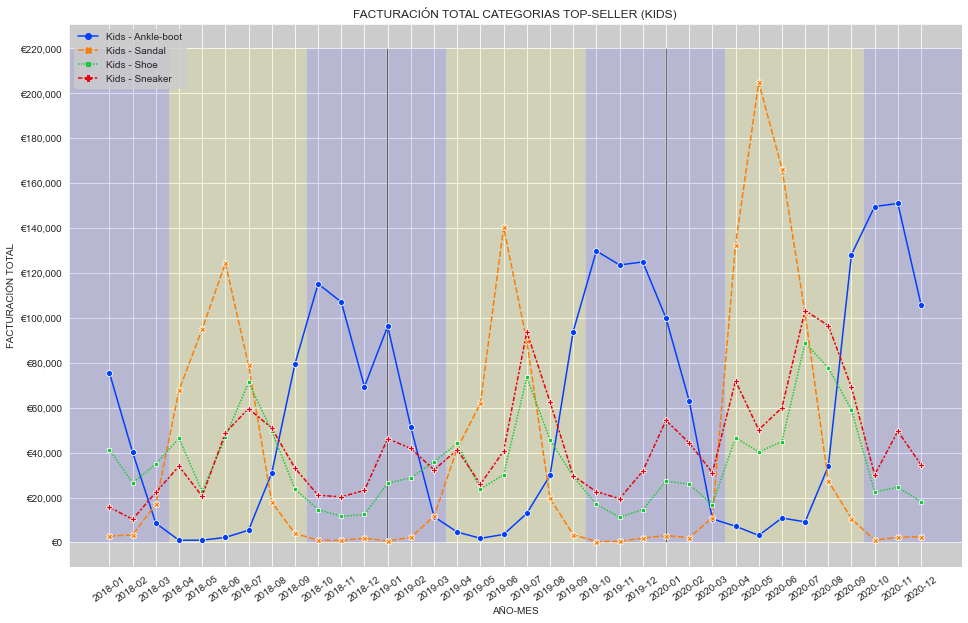

In [ ]:
# Tamaño del plot
plt.figure(figsize=(16,10))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
# Lineplot
ax = sns.lineplot(data=topsellerskids, x='ANO_MES_FACTURA', y='IMP_VENTA_NETO_EUR', hue='CATEGORIA', style='CATEGORIA', markers=True, palette='bright')
    
# Area de fondo coloreada (Temporada F/W, S/S)
ax.axhspan(ymin=0, ymax=220000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=220000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

# Separador años
ax.axhspan(ymin=0, ymax=220000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
ax.axhspan(ymin=0, ymax=220000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
# localización del cuadro de leyenda
plt.legend(loc='upper left')

# Formato eje X: rotación de labels
plt.xticks(rotation=35)
    
# Formato eje Y: comas y €
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje Y: rango de ticks
ax.yaxis.set_ticks(np.arange(0, 226000, 20000))

# Labels de los ejes
ax.set(xlabel='AÑO-MES', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL CATEGORIAS TOP-SELLER (KIDS)')
        
plt.show()

In [ ]:
lowsellerskids = campermesano.loc[(camperlean.GENERO_PRODUCTO == 'KIDS') & (~camperlean.CATEGORIA.isin(['Kids - Ankle-boot', 'Kids - Sneaker', 'Kids - Sandal', 'Kids - Shoe'])), :].groupby(by=['ANO_MES_FACTURA', 'CATEGORIA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
lowsellerskids

,ANO_MES_FACTURA,CATEGORIA,IMP_VENTA_NETO_EUR
0,2018-01,Kids - Ankle-boot/Boot,"56,506.42"
1,2018-01,Kids - Mid Boot,"2,443.74"
2,2018-01,Kids - Moccasin/Ballerina,"14,283.25"
3,2018-01,Kids - Moccasin/Nautical,"1,536.65"
4,2018-01,Kids - Slipper,"4,026.30"
...,...,...,...
198,2020-12,Kids - Mid Boot,"27,209.56"
199,2020-12,Kids - Moccasin/Ballerina,"8,723.73"
200,2020-12,Kids - Moccasin/Nautical,"1,506.99"
201,2020-12,Kids - Slipper,"4,235.12"


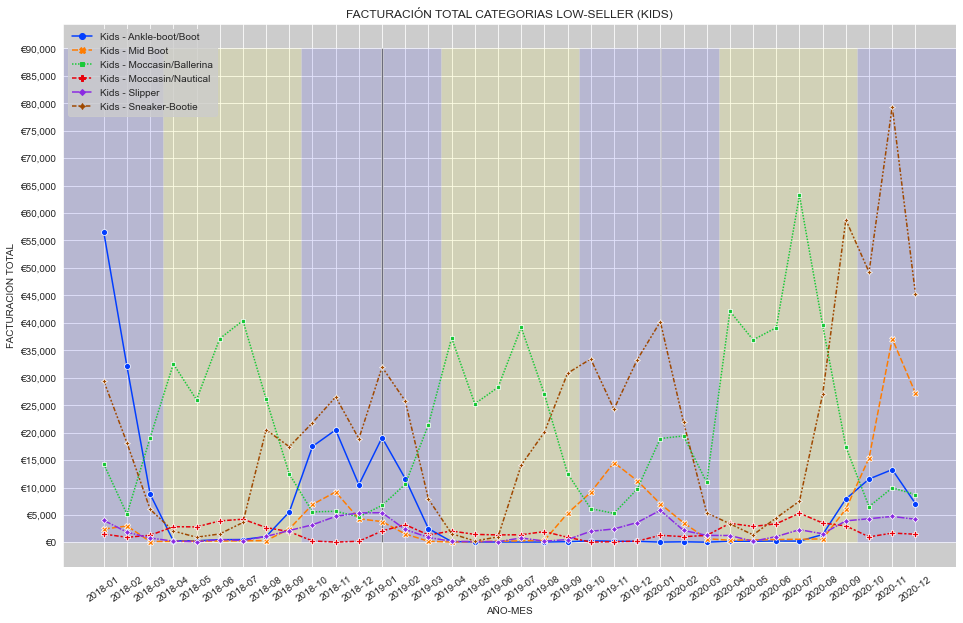

In [ ]:
# Tamaño del plot
plt.figure(figsize=(16,10))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
    
# Lineplot
ax = sns.lineplot(data=lowsellerskids, x='ANO_MES_FACTURA', y='IMP_VENTA_NETO_EUR', hue='CATEGORIA', style='CATEGORIA', markers=True, palette='bright')
    
# Area de fondo coloreada (Temporada F/W, S/S)
ax.axhspan(ymin=0, ymax=90000, xmin=0, xmax=0.112, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.112, xmax=0.266, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.266, xmax=0.423, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.423, xmax=0.578, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.578, xmax=0.735, facecolor='blue', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.735, xmax=0.889, facecolor='yellow', alpha=0.10)
ax.axhspan(ymin=0, ymax=90000, xmin=0.889, xmax=1, facecolor='blue', alpha=0.10)

# Separador años
ax.axhspan(ymin=0, ymax=90000, xmin=0.3558, xmax=0.3578, facecolor='black', alpha=0.5)
ax.axhspan(ymin=0, ymax=90000, xmin=0.668, xmax=0.670, facecolor='black', alpha=0.5)
    
# localización del cuadro de leyenda
plt.legend(loc='upper left')

# Formato eje X: rotación de labels
plt.xticks(rotation=35)
    
# Formato eje Y: comas y €
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje Y: rango de ticks
ax.yaxis.set_ticks(np.arange(0, 91000, 5000))

# Labels de los ejes
ax.set(xlabel='AÑO-MES', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL CATEGORIAS LOW-SELLER (KIDS)')
        
plt.show()

In [ ]:
camperlean.head()

,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO
0,2845640249,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,2018,12,2018-12-10,146.01,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DE,Köln,DE
1,2843635446,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,2018,12,2018-12-10,172.63,87,F/W,2018,K400342-001,41,GB,101IMNIMN0MK400342,1.00,Zapatos Adulto,Iman,Iman,WOMEN,Women Mid boot,Lace Up Bootie,Black,Negro,Dark colours,UNDEFINED,70.0,70 ++,GB,West Wittering,EN
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38.0,30-39,CA,Toronto,EN
3,2843635538,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,2018,12,2018-12-10,61.41,87,F/W,2018,18811-061,45,GB,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Lt. Pastel Grey,Gris,Pastel,WOMAN,UNDEFINED,UNDEFINED,GB,London,EN
4,2853601888,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,2018,12,2018-12-10,107.22,87,F/W,2018,K300192-005,42,DK,101PEUPEUCHK300192,1.00,Zapatos Adulto,Peu,Peu Cami,MEN,Men Ankle Boot,Basket bootie,Black,Negro,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DK,Valby,EN


In [ ]:
edadfact = camperdefined2.groupby(by=['GENERO_CONTACTO','EDAD_COMPRA'], as_index=False).IMP_VENTA_NETO_EUR.sum()
edadfact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GENERO_CONTACTO     167 non-null    object 
 1   EDAD_COMPRA         167 non-null    int64  
 2   IMP_VENTA_NETO_EUR  167 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


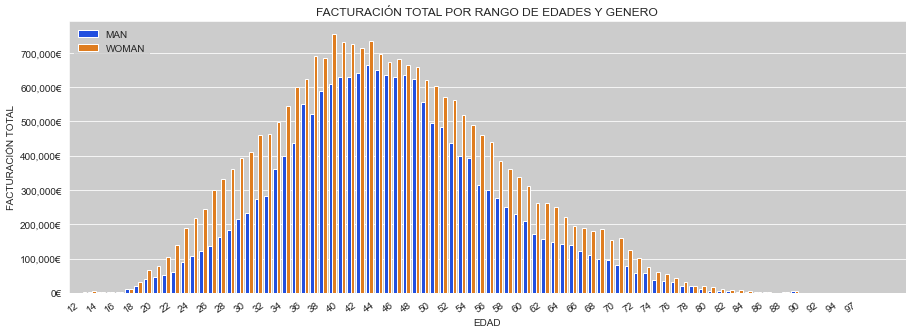

In [ ]:
# Tamaño del plot
plt.figure(figsize=(15,5))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})

ax = sns.barplot(x=edadfact.EDAD_COMPRA , y=edadfact.IMP_VENTA_NETO_EUR , hue=edadfact.GENERO_CONTACTO, palette='bright')

# localización del cuadro de leyenda
plt.legend(loc='upper left')
    
# Formato eje Y: comas y €
fmt = '{x:,.0f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje X: rango de ticks
ax.xaxis.set_ticks(np.arange(0, 92, 2))

# Formato eje X: rotación de labels
plt.xticks(rotation=35)

# Labels de los ejes
ax.set(xlabel='EDAD', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL POR RANGO DE EDADES Y GENERO')

plt.show()

In [ ]:
rangoedadfact = camperdefined2.groupby(by=['GENERO_CONTACTO','EDAD_RANGO_COMPRA'], as_index=False).IMP_VENTA_NETO_EUR.sum()

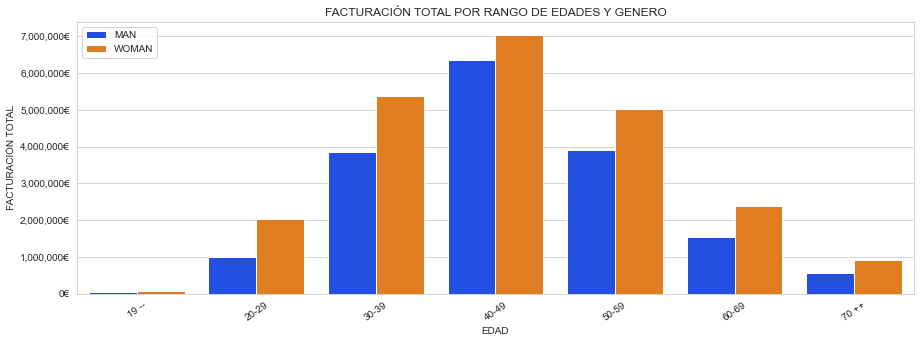

In [ ]:
# Tamaño del plot
plt.figure(figsize=(15,5))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("whitegrid", {"axes.facecolor": "1"})

ax = sns.barplot(x=rangoedadfact.EDAD_RANGO_COMPRA , y=rangoedadfact.IMP_VENTA_NETO_EUR , hue=rangoedadfact.GENERO_CONTACTO, palette='bright')

# localización del cuadro de leyenda
plt.legend(loc='upper left')
    
# Formato eje Y: comas y €
fmt = '{x:,.0f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje X: rotación de labels
plt.xticks(rotation=35)

# Labels de los ejes
ax.set(xlabel='EDAD', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL POR RANGO DE EDADES Y GENERO')

plt.show()

In [ ]:
camperdefined2 = camperlean.loc[(camperlean.EDAD_COMPRA != 'UNDEFINED') & (camperlean.GENERO_CONTACTO != 'UNDEFINED'), :]

camperdefined2.EDAD_COMPRA =  pd.to_numeric(camperdefined2.EDAD_COMPRA).astype(int)

camperdefined2.head()

/Users/darkxiii/opt/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38,30-39,CA,Toronto,EN
5,2843635424,JcFqi5P38tzXkJcxFeHwHFDj/gqqBTIJoVRTgAi5tco=,2018,12,2018-12-10,79.94,87,F/W,2018,K300237-005,44,GB,101CHSCHSSHK300237,1.00,Zapatos Adulto,Chasis,Chasis Sport,MEN,Men Ankle Boot,Basket bootie,Dark Green,Verde,Neutral tones,MAN,35,30-39,GB,Merseyside,EN
7,2845640218,U6o8+HfIst5GphBfd/Schy+ApjljN/JwFRyJ6fWWfqg=,2018,12,2018-12-10,131.41,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,WOMAN,41,40-49,DE,Berlin,DE
8,2850604952,uz+DnPDbT9lJ95ZZ95ZgijR2QpPH2YNjA+Z1bRFUfFQ=,2018,12,2018-12-10,143.60,87,F/W,2018,36544-066,41,NL,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,MAN,42,40-49,NL,Sassenheim,EN
9,2845640271,i2IRzmrn4fMHrVyOQyXsecNwhKG+gPgHJmGHKl0UAsc=,2018,12,2018-12-10,66.17,87,F/W,2018,18811-038,42,DE,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Dark Gray,Gris,Dark colours,MAN,35,30-39,DE,Bielefeld,DE


In [ ]:
camperdefined2.groupby(by=['GENERO_CONTACTO', 'GENERO_PRODUCTO']).GENERO_PRODUCTO.count()

GENERO_CONTACTO  GENERO_PRODUCTO
MAN              KIDS                11418
                 MEN                132241
                 WOMEN               20754
WOMAN            KIDS                31904
                 MEN                 31628
                 WOMEN              159062
Name: GENERO_PRODUCTO, dtype: int64

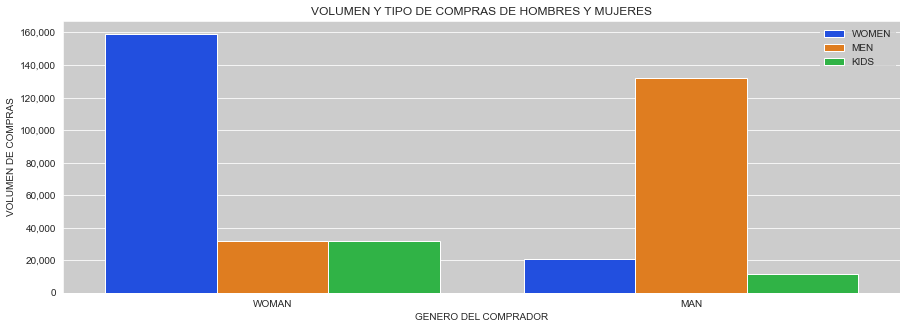

In [ ]:
# Tamaño del plot
plt.figure(figsize=(15,5))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})

ax = sns.countplot(x = 'GENERO_CONTACTO', hue = 'GENERO_PRODUCTO', data = camperdefined2, palette = 'bright')

# localización del cuadro de leyenda
plt.legend(loc='best')
    
# Formato eje Y: comas y €
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Labels de los ejes
ax.set(xlabel='GENERO DEL COMPRADOR', ylabel='VOLUMEN DE COMPRAS')

plt.title('VOLUMEN Y TIPO DE COMPRAS DE HOMBRES Y MUJERES')
plt.show()

In [ ]:
pd.crosstab(camperdefined2.GENERO_CONTACTO, camperdefined2.GENERO_PRODUCTO, normalize = "index")

GENERO_PRODUCTO,KIDS,MEN,WOMEN
GENERO_CONTACTO,,,
MAN,0.07,0.80,0.13
WOMAN,0.14,0.14,0.71


Text(0.5, 1.0, 'COMPRAS HOMBRES')

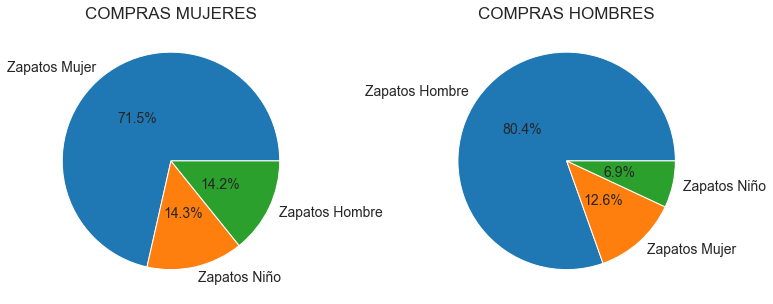

In [ ]:
fig = plt.figure(figsize=[13,5])

ax1 = fig.add_subplot(121)
labelswomen = ['Zapatos Mujer', 'Zapatos Niño', 'Zapatos Hombre']
ax1.pie(x=camperdefined2.loc[camperdefined2.GENERO_CONTACTO == 'WOMAN', :].GENERO_PRODUCTO.value_counts(), autopct="%1.1f%%", labels=labelswomen, pctdistance=0.5, textprops={'fontsize': 14})
ax1.set_title('COMPRAS MUJERES',fontsize= 17)

ax2 = fig.add_subplot(122)
labelsmen = ['Zapatos Hombre', 'Zapatos Mujer', 'Zapatos Niño']
ax2.pie(x=camperdefined2.loc[camperdefined2.GENERO_CONTACTO == 'MAN', :].GENERO_PRODUCTO.value_counts(), autopct="%1.1f%%", labels=labelsmen, pctdistance=0.5, textprops={'fontsize': 14})
ax2.set_title('COMPRAS HOMBRES',fontsize= 17)



In [ ]:
aux = pd.crosstab(camperdefined2.GENERO_CONTACTO, camperdefined2.GENERO_PRODUCTO, normalize = "index", columns=)
aux

GENERO_PRODUCTO,KIDS,MEN,WOMEN
GENERO_CONTACTO,,,
MAN,0.07,0.80,0.13
WOMAN,0.14,0.14,0.71


<AxesSubplot:xlabel='GENERO_CONTACTO'>

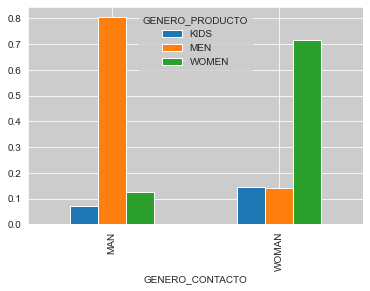

In [ ]:
aux.plot.bar()

In [ ]:
aux2 = aux.reset_index() 
aux2

GENERO_PRODUCTO,GENERO_CONTACTO,KIDS,MEN,WOMEN
0,MAN,0.07,0.80,0.13
1,WOMAN,0.14,0.14,0.71


In [ ]:
camperlean.head()

,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO
0,2845640249,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,2018,12,2018-12-10,146.01,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DE,Köln,DE
1,2843635446,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,2018,12,2018-12-10,172.63,87,F/W,2018,K400342-001,41,GB,101IMNIMN0MK400342,1.00,Zapatos Adulto,Iman,Iman,WOMEN,Women Mid boot,Lace Up Bootie,Black,Negro,Dark colours,UNDEFINED,70.0,70 ++,GB,West Wittering,EN
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38.0,30-39,CA,Toronto,EN
3,2843635538,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,2018,12,2018-12-10,61.41,87,F/W,2018,18811-061,45,GB,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Lt. Pastel Grey,Gris,Pastel,WOMAN,UNDEFINED,UNDEFINED,GB,London,EN
4,2853601888,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,2018,12,2018-12-10,107.22,87,F/W,2018,K300192-005,42,DK,101PEUPEUCHK300192,1.00,Zapatos Adulto,Peu,Peu Cami,MEN,Men Ankle Boot,Basket bootie,Black,Negro,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DK,Valby,EN


In [ ]:
repeat = camperlean.loc[:,['CUSTOMER_ID', 'CATEGORIA', 'CONSUMER_COLOR', 'CAT_COLOR', 'FECHA_FACTURA', 'IMP_VENTA_NETO_EUR']]
repeat.head()

,CUSTOMER_ID,CATEGORIA,CONSUMER_COLOR,CAT_COLOR,FECHA_FACTURA,IMP_VENTA_NETO_EUR
0,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,Men Ankle Boot,Gris,Dark colours,2018-12-10,146.01
1,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,Women Mid boot,Negro,Dark colours,2018-12-10,172.63
2,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,Women High Boot,Negro,Dark colours,2018-12-10,157.36
3,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,Men Slipper,Gris,Pastel,2018-12-10,61.41
4,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,Men Ankle Boot,Negro,Dark colours,2018-12-10,107.22


In [ ]:
aux = repeat.groupby(['CUSTOMER_ID', 'FECHA_FACTURA']).sum().reset_index()
aux

,CUSTOMER_ID,FECHA_FACTURA,IMP_VENTA_NETO_EUR
0,++/DcYFzQ1gIUJza+neA8NadxET0/nofxMP2xeocbt4=,2018-01-05,214.88
1,++/RB4do2DxW6/bkh8jUK3zw9JxzStn/dbEjQxvIxkQ=,2020-11-21,207.67
2,++00bzGka2b8Wztp2jO3FgPtNBlG7EddjjW/7+WxP4o=,2019-01-15,133.20
3,++02Ly6o8yS/HLJrSkkNiguWcOWl7268zltL3qvkv4Q=,2018-06-18,128.07
4,++2M85GZOkggCCk8EC5PyRmRjeeQTsmswSlLwA7xZd4=,2019-09-19,173.25
...,...,...,...
826717,zzx8SoQJefRX1/2jmKTTmFxHk7CbpBe5KV6fOedaSR8=,2018-11-30,214.34
826718,zzx8SoQJefRX1/2jmKTTmFxHk7CbpBe5KV6fOedaSR8=,2020-06-12,85.72
826719,zzzQiUfgIUY1DgB653FbVcRUVxKTPafMP2wLDVT8Xzs=,2020-01-18,102.79
826720,zzzfi+QNP+Ce5s+UcQTCYVDtjLnQtBt6DcCVDI6LvHU=,2018-01-12,150.00


In [ ]:
aux2 = aux.CUSTOMER_ID.value_counts().reset_index()
aux2

,index,CUSTOMER_ID
0,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
1,2eS7vLUbTbjbJf9ip+zUnQaEGX6iFrPOYA2VHssf6hM=,265
2,lxZaVWzsespHCsJeG/RylO1oXqLvaEW+SCjOUJhJnNY=,165
3,J3+bSWrbjJBK0w93XbcIDN5EENotCX6Pf1BJoiTWd8E=,148
4,LYKl+CTZN60aS6xwuRs3VvhtNvcSDCe2wSk7ooB6mRI=,128
...,...,...
499219,4dlHSlpwk9QKNGJnbVes9f8ntDx/i9Qb70o4ujgAMHM=,1
499220,QH70zaHJqekyKsQiPdz6A1q8Xl1Liv/u3quW0ZOrsW4=,1
499221,wslrwH+dKZVULonGbk/MWm5HVZFZzHLayGYJWHiYqzA=,1
499222,MTY+PqF4Nxqcei0FC+AU0+bvk+KoFjcL+qU9Xb+WOVQ=,1


In [ ]:
aux3 = pd.merge(repeat, aux2, left_on = 'CUSTOMER_ID', right_on = 'index', how='left')
aux3.sort_values('CUSTOMER_ID_y', ascending=False)
#aux3.drop('index', inplace=True)

,CUSTOMER_ID_x,CATEGORIA,CONSUMER_COLOR,CAT_COLOR,FECHA_FACTURA,IMP_VENTA_NETO_EUR,index,CUSTOMER_ID_y
258687,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,Men Ankle Boot,Marrón,Browns,2018-03-12,99.18,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
846061,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,Men Sneaker,Verde,Neutral tones,2020-12-18,118.80,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
1456,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,Men Shoe,Negro,Dark colours,2018-12-10,165.29,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
258318,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,Women Sneaker,Multicolor,Colourful,2018-03-10,129.14,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
124702,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,Women Sandal,Negro,Dark colours,2020-07-07,92.97,U83Hms6U4ueMr4nz7C1/oNURckPvj2qS/JyOJBQdNWU=,387
...,...,...,...,...,...,...,...,...
330710,NlZVJZ9tp7ZKIZUl2+nFHbTTM4H0wUx1tGpTt2msXmI=,Men Shoe,Negro,Dark colours,2019-02-14,86.78,NlZVJZ9tp7ZKIZUl2+nFHbTTM4H0wUx1tGpTt2msXmI=,1
330711,bPAXes4n69zRlpf3hXtnM9LAvzcLyp6vMRugggvx5qg=,Women Sneaker,Negro,Dark colours,2019-02-14,86.78,bPAXes4n69zRlpf3hXtnM9LAvzcLyp6vMRugggvx5qg=,1
330712,OVSXrh9VTH/9jl71vd0a2AvUMWhmZetUL7IyR6/jnig=,Men Sneaker,Marrón,Browns,2019-02-14,127.03,OVSXrh9VTH/9jl71vd0a2AvUMWhmZetUL7IyR6/jnig=,1
722549,TvCLOKtsC3y9TMg2VaD8DudwPjqToZTWO46ESdzOiwQ=,Men Mid Boot,Multicolor,Colourful,2018-11-14,185.03,TvCLOKtsC3y9TMg2VaD8DudwPjqToZTWO46ESdzOiwQ=,1


,CUSTOMER_ID_x,CATEGORIA,CONSUMER_COLOR,CAT_COLOR,FECHA_FACTURA,IMP_VENTA_NETO_EUR,index,CUSTOMER_ID_y
0,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,Men Ankle Boot,Gris,Dark colours,2018-12-10,146.01,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,2
1,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,Women Mid boot,Negro,Dark colours,2018-12-10,172.63,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,2
2,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,Women High Boot,Negro,Dark colours,2018-12-10,157.36,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,1
3,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,Men Slipper,Gris,Pastel,2018-12-10,61.41,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,1
4,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,Men Ankle Boot,Negro,Dark colours,2018-12-10,107.22,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,2
...,...,...,...,...,...,...,...,...
1051321,QAMSuxVo5sElGTA2GMEkSpGCxe5q8Ib/7DIiP7QJNag=,Kids - Sandal,Multicolor,Colourful,2020-07-05,37.24,QAMSuxVo5sElGTA2GMEkSpGCxe5q8Ib/7DIiP7QJNag=,1
1051322,wtOB3RYxp0wgBgWMvE3wF4s8PkA5UxmFLZtitjEo8Mw=,Men Sandal,Negro,Dark colours,2020-07-05,141.90,wtOB3RYxp0wgBgWMvE3wF4s8PkA5UxmFLZtitjEo8Mw=,2
1051323,PZ/ulJC2XYS1eJySexz3/mYGn/LIhAn6AnGn2+pG/Xs=,Women Sandal,Azul,Dark colours,2020-07-05,72.53,PZ/ulJC2XYS1eJySexz3/mYGn/LIhAn6AnGn2+pG/Xs=,1
1051324,1fXnboJtm3Z2UzZ82L3hb0lqkw+/L4jQLS5wW1oJ3go=,Men Sandal,Negro,Dark colours,2020-07-05,141.90,1fXnboJtm3Z2UzZ82L3hb0lqkw+/L4jQLS5wW1oJ3go=,1


In [ ]:
camperlean.LINEA.value_counts()

Peu Cami             70348
TWS                  68234
Right Nina           45567
Beetle               33848
Runner Four          28024
                     ...  
Pelotas Unball           1
G3D Pix                  1
Mami Kids                1
Pelotas Persil FW        1
G3D Bill                 1
Name: LINEA, Length: 282, dtype: int64

In [ ]:
camperlean.CATEGORIA.value_counts()

Men Shoe                     144041
Men Sneaker                  119719
Women Sandal                 105844
Women Sneaker                 96932
Women Ankle Boot              85587
Women Shoe                    77662
Men Ankle Boot                75569
Women Moccasin/Ballerina      47465
Women Mid boot                30364
Kids - Sneaker                27816
Kids - Ankle-boot             27332
Men Sneaker Boot              26923
Kids - Sandal                 25506
Men Sandal                    23346
Kids - Shoe                   20963
Women Sneaker Bootie          20080
Women - Semi-open Shoe        19008
Kids - Moccasin/Ballerina     12418
Men Mid Boot                  12417
Kids - Sneaker-Bootie         11294
Men Slipper                   11157
Women Slipper                  8114
Women High Boot                7976
Kids - Ankle-boot/Boot         3481
Men Mocasin/Nautical           3367
Kids - Mid Boot                2085
Kids - Slipper                 1778
Men Flip-Flop               

In [ ]:
camperdefined2.head()

,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38,30-39,CA,Toronto,EN
5,2843635424,JcFqi5P38tzXkJcxFeHwHFDj/gqqBTIJoVRTgAi5tco=,2018,12,2018-12-10,79.94,87,F/W,2018,K300237-005,44,GB,101CHSCHSSHK300237,1.00,Zapatos Adulto,Chasis,Chasis Sport,MEN,Men Ankle Boot,Basket bootie,Dark Green,Verde,Neutral tones,MAN,35,30-39,GB,Merseyside,EN
7,2845640218,U6o8+HfIst5GphBfd/Schy+ApjljN/JwFRyJ6fWWfqg=,2018,12,2018-12-10,131.41,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,WOMAN,41,40-49,DE,Berlin,DE
8,2850604952,uz+DnPDbT9lJ95ZZ95ZgijR2QpPH2YNjA+Z1bRFUfFQ=,2018,12,2018-12-10,143.60,87,F/W,2018,36544-066,41,NL,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,MAN,42,40-49,NL,Sassenheim,EN
9,2845640271,i2IRzmrn4fMHrVyOQyXsecNwhKG+gPgHJmGHKl0UAsc=,2018,12,2018-12-10,66.17,87,F/W,2018,18811-038,42,DE,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Dark Gray,Gris,Dark colours,MAN,35,30-39,DE,Bielefeld,DE


In [ ]:
len(camperlean)

1051326

In [ ]:
camperlean.GENERO_CONTACTO.value_counts()

UNDEFINED    599195
WOMAN        263287
MAN          188844
Name: GENERO_CONTACTO, dtype: int64

In [ ]:
188844/len(camperlean)

0.17962458837696396

In [ ]:
camperlean.EDAD_RANGO_COMPRA.value_counts()

UNDEFINED    287415
40-49        273411
30-39        198512
50-59        152178
60-69         61983
20-29         53969
70 ++         21955
19 --          1903
Name: EDAD_RANGO_COMPRA, dtype: int64

In [ ]:
273411/len(camperlean)

0.26006300614652356

In [ ]:
camperlean.loc[camperlean.ANO_FACTURA == 2020, :].LINEA.value_counts()

TWS               33901
Peu Cami          29692
Right Nina        18312
Courb             15492
Peu Touring       12468
                  ...  
Tomorrow              1
G3D Bill              1
Ivy                   1
Pelotas Unball        1
Marges Kids           1
Name: LINEA, Length: 228, dtype: int64

In [ ]:
camperlean.head()

,FACTURA_ID,CUSTOMER_ID,ANO_FACTURA,MES_FACTURA,FECHA_FACTURA,IMP_VENTA_NETO_EUR,TEMPORADA_COMERCIAL_ID,TEMPORADA,ANO_TEMPORADA,PRODUCTO_ID,TALLA,NUMERO_DEUDOR_PAIS_ID,JERARQUIA_PROD_ID,GRUPO_ARTICULO_PRODUCTO_ID,GRUPO_ARTICULO,CONCEPTO,LINEA,GENERO_PRODUCTO,CATEGORIA,TIPOLOGIA,COLOR,CONSUMER_COLOR,CAT_COLOR,GENERO_CONTACTO,EDAD_COMPRA,EDAD_RANGO_COMPRA,PAIS_CONTACTO,CIUDAD_CONTACTO,IDIOMA_CONTACTO
0,2845640249,P7J3PKz0JIR572t8yHHHCVZfZh3M0mq+Edz6GI0hrww=,2018,12,2018-12-10,146.01,87,F/W,2018,36544-066,40,DE,101PEUPEUPH36544,1.00,Zapatos Adulto,Peu,Peu Pista,MEN,Men Ankle Boot,Basket bootie,Charcoal,Gris,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DE,Köln,DE
1,2843635446,SNeh3vZmE/ewD2gPpqYJRVXGvgteol34lqyaCvilIVs=,2018,12,2018-12-10,172.63,87,F/W,2018,K400342-001,41,GB,101IMNIMN0MK400342,1.00,Zapatos Adulto,Iman,Iman,WOMEN,Women Mid boot,Lace Up Bootie,Black,Negro,Dark colours,UNDEFINED,70.0,70 ++,GB,West Wittering,EN
2,2857608269,JUAmX33OQhZAg/siFrrklFs04qpY6aKsUSZk3WQ56FY=,2018,12,2018-12-10,157.36,87,F/W,2018,K400340-001,39,CA,101KIEKIE0MK400340,1.00,Zapatos Adulto,Katie,Katie,WOMEN,Women High Boot,Medium Cowboy,Black,Negro,Dark colours,WOMAN,38.0,30-39,CA,Toronto,EN
3,2843635538,xwmLCtiyM/z02+fncnw9I4xmOHXOtLqTbmASBrw36FU=,2018,12,2018-12-10,61.41,87,F/W,2018,18811-061,45,GB,101WABWAB0H18811,1.00,Zapatos Adulto,Wabi,Wabi,MEN,Men Slipper,Slipper,Lt. Pastel Grey,Gris,Pastel,WOMAN,UNDEFINED,UNDEFINED,GB,London,EN
4,2853601888,Ty4UJE6C4zZRgvGw8xBn2wByj6jRBP30ALVp92sIKu4=,2018,12,2018-12-10,107.22,87,F/W,2018,K300192-005,42,DK,101PEUPEUCHK300192,1.00,Zapatos Adulto,Peu,Peu Cami,MEN,Men Ankle Boot,Basket bootie,Black,Negro,Dark colours,UNDEFINED,UNDEFINED,UNDEFINED,DK,Valby,EN


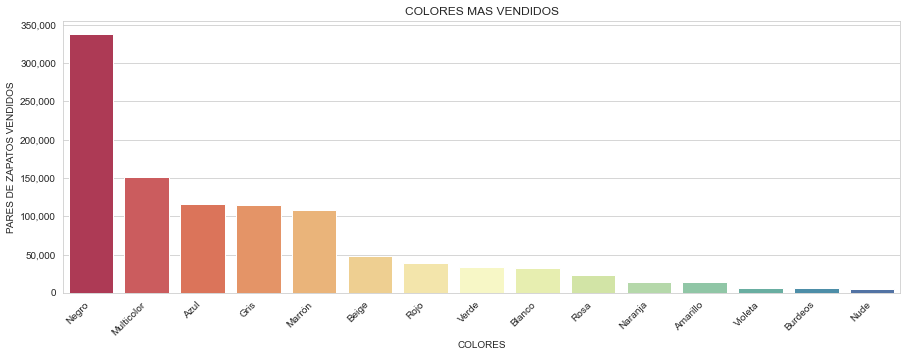

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x=camperlean['CONSUMER_COLOR'], order = camperlean['CONSUMER_COLOR'].value_counts().index, palette='Spectral')
    
# Formato eje Y: comas y €
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje X: rotación de labels
plt.xticks(rotation=45, ha='right')

# Labels de los ejes
ax.set(xlabel='COLORES', ylabel='PARES DE ZAPATOS VENDIDOS')

# Label título
plt.title('COLORES MAS VENDIDOS')

plt.show()

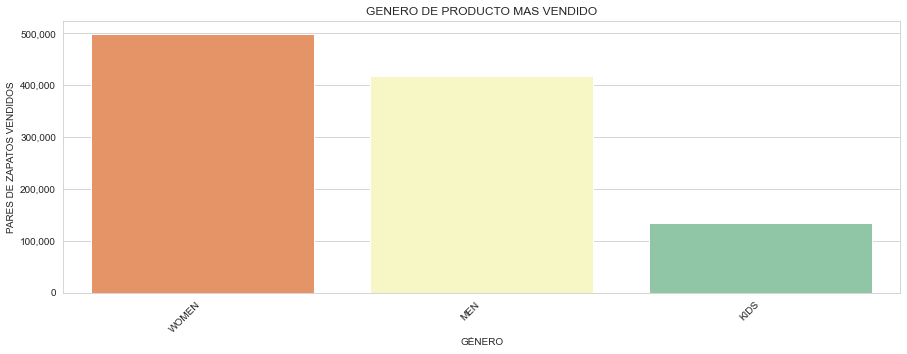

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x=camperlean['GENERO_PRODUCTO'], order = camperlean['GENERO_PRODUCTO'].value_counts().index, palette='Spectral')

# Formato eje Y: comas y €
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje X: rotación de labels
plt.xticks(rotation=45, ha='right')

# Labels de los ejes
ax.set(xlabel='GÉNERO', ylabel='PARES DE ZAPATOS VENDIDOS')

# Label título
plt.title('GENERO DE PRODUCTO MAS VENDIDO')

plt.show()

In [ ]:
plt.figure(figsize=[10,5])

labelswomen = ['WOMEN', 'KIDS', 'MEN']
ax1.pie(x=camperdefined2.loc[camperdefined2.GENERO_CONTACTO == 'WOMAN', :].GENERO_PRODUCTO.value_counts(), autopct="%1.1f%%", labels=labelswomen, pctdistance=0.5, textprops={'fontsize': 14})
ax1.set_title('COMPRAS MUJERES',fontsize= 17)

In [ ]:
aux = camperlean.groupby('ANO_FACTURA', as_index=False).IMP_VENTA_NETO_EUR.sum()
aux

,ANO_FACTURA,IMP_VENTA_NETO_EUR
0,2018,"29,871,352.69"
1,2019,"35,274,508.35"
2,2020,"47,701,273.14"


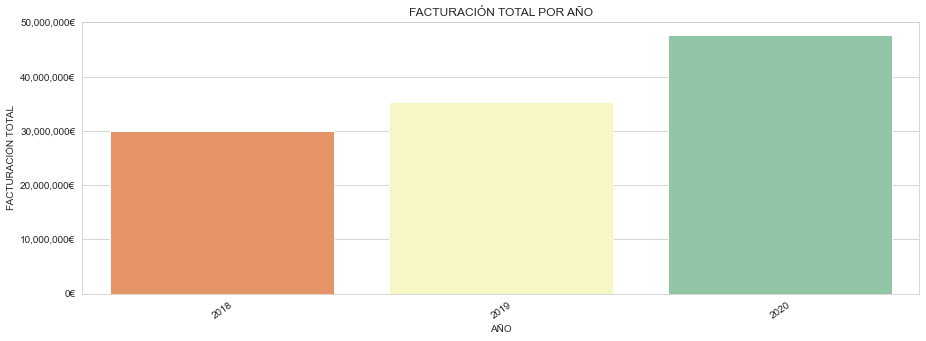

In [ ]:
# Tamaño del plot
plt.figure(figsize=(15,5))
    
# Tipo de grid del plot, ajustar facecolor para mas gris o mas blanco
sns.set_style("whitegrid", {"axes.facecolor": "1"})

ax = sns.barplot(x=aux.ANO_FACTURA , y=aux.IMP_VENTA_NETO_EUR, palette='Spectral')
    
# Formato eje Y: comas y €
fmt = '{x:,.0f}€'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Formato eje X: rotación de labels
plt.xticks(rotation=35)

# Labels de los ejes
ax.set(xlabel='AÑO', ylabel='FACTURACIÓN TOTAL')

# Label título
plt.title('FACTURACIÓN TOTAL POR AÑO')

plt.show()

In [ ]:
camperlean.IMP_VENTA_NETO_EUR.describe()

count   1,051,326.00
mean          107.34
std            44.05
min             0.00
25%            75.40
50%           100.00
75%           132.35
max           603.96
Name: IMP_VENTA_NETO_EUR, dtype: float64

In [ ]:
camperlean.groupby(by='CUSTOMER_ID', as_index=False).IMP_VENTA_NETO_EUR.sum().describe()

,IMP_VENTA_NETO_EUR
count,"499,224.00"
mean,226.05
std,374.79
min,0.00
25%,100.41
50%,150.00
75%,255.43
max,"144,673.50"


In [ ]:
aux.IMP_VENTA_NETO_EUR.describe()

count   499,224.00
mean        226.05
std         374.79
min           0.00
25%         100.41
50%         150.00
75%         255.43
max     144,673.50
Name: IMP_VENTA_NETO_EUR, dtype: float64